<a href="https://colab.research.google.com/github/AdityaDhiman05/UPI-Fraud-Detection-Project/blob/main/DAY_8_CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 8 – Model Selection & Training

Today we start training machine learning models on our prepared UPI dataset.
The goal is to test different regression models, build a baseline, and compare how well each model predicts UPI transaction trends.

Why use multiple models?

Each algorithm has strengths/weaknesses.

Linear models capture simple trends.

Tree/boosting models capture complex, non-linear patterns.

Train 3 regression models: Linear Regression, Random Forest, XGBoost.

Evaluate model performance using MAE, RMSE, and R² Score.

Compare models to select the best one.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from google.colab import files
uploaded = files.upload()



train_df = pd.read_csv("upi_train_prepared.csv")
test_df = pd.read_csv("upi_test_prepared.csv")

X_train_scaled = train_df[["Banks_Live_Scaled"]].values
y_train = train_df["Volume_Mn"].values

X_test_scaled = test_df[["Banks_Live_Scaled"]].values
y_test = test_df["Volume_Mn"].values

train_df.head()
test_df.head()

Saving upi_test_prepared.csv to upi_test_prepared (1).csv
Saving upi_train_prepared.csv to upi_train_prepared (1).csv


,Banks_Live_Scaled,Volume_Mn
0,0.502821,7829.49
1,-1.222456,0.09
2,-0.648957,918.35
3,0.096592,4617.15
4,-1.112535,4.38


**FIRST WE'LL TRAIN BASELINE MODEL: LINEAR REGRESSION MODEL**

We will begin with Linear Regression beacuse it's the simplest regression algorithm.
This will acts as a base to compare with more advanced models.

In [13]:

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


Linear Regression:
MAE: 924.4596957633242
RMSE: 1137.1226324038057
R² Score: 0.9598285635696526


**Train Random Forest Regressor**

Random Forest captures non-linear relationships using multiple decision trees.

In [14]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


Random Forest Performance:
MAE: 263.2474254347826
RMSE: 389.04396889934293
R² Score: 0.995297810487064


**Train XGBoost Regressor**

XGBoost is a boosting algorithm that improves accuracy by combining weak learners.

In [15]:
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost Performance:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


XGBoost Performance:
MAE: 299.94191599032143
RMSE: 486.0985187916209
R² Score: 0.9926590654878438


**COMPARING ALL THE MODELS**


In [16]:
results = {
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xgb),
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    ],
    "R² Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb),
    ]
}

results_df = pd.DataFrame(results)
results_df


,Model,MAE,RMSE,R² Score
0,Linear Regression,924.459696,1137.122632,0.959829
1,Random Forest,263.247425,389.043969,0.995298
2,XGBoost,299.941916,486.098519,0.992659


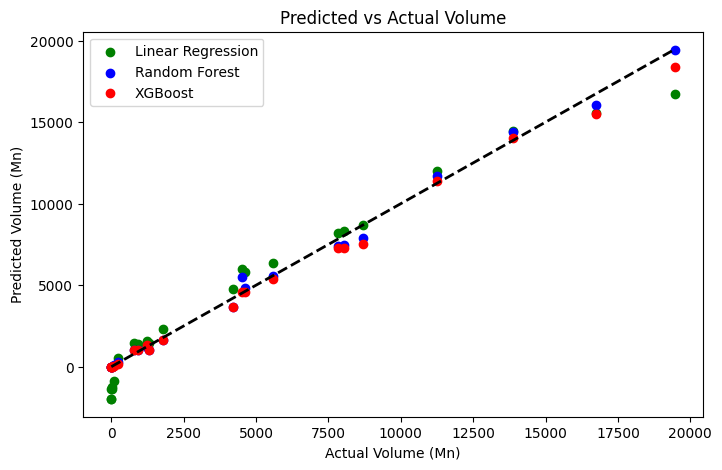

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, color='green', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='blue', label='Random Forest')
plt.scatter(y_test, y_pred_xgb, color='red', label='XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Volume (Mn)")
plt.ylabel("Predicted Volume (Mn)")
plt.title("Predicted vs Actual Volume")
plt.legend()
plt.show()
